# ***Drug Classification***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Practice dataset 2 KNNClassifier drug_classification.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## EDA

In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug_Type      0
dtype: int64

## Data Transformation

In [ ]:
df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_Type_drugA,Drug_Type_drugB,Drug_Type_drugC,Drug_Type_drugX
0,23,25.355,False,False,False,False,False,False,False,False
1,47,13.093,True,True,False,False,False,False,True,False
2,47,10.114,True,True,False,False,False,False,True,False
3,28,7.798,False,False,True,False,False,False,False,True
4,61,18.043,False,True,False,False,False,False,False,False


## Data Splitting

In [8]:
x = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']

In [9]:
x_new = pd.get_dummies(x, drop_first=True)
x_new.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,False,False,False,False
1,47,13.093,True,True,False,False
2,47,10.114,True,True,False,False
3,28,7.798,False,False,True,False
4,61,18.043,False,True,False,False


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_new = encoder.fit_transform(y)

## Data Scaling

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_new)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_new, test_size=0.2, random_state=42)

In [13]:
para =  {
    "n_neighbors": np.arange(1,21,2), #odd values of k from 1 to 20
    "weights": ["uniform", "distance"], 
    "metric": ["eucledian", "manhattan", "minkowski"]
}

## Model

In [14]:
knn = KNeighborsRegressor()

In [15]:
knn_reg=GridSearchCV(KNeighborsRegressor(),para,cv=10)

In [16]:
knn_reg.fit(x_train,y_train)

c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\pandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['eucledian', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']})

In [17]:
knn_reg.best_score_

np.float64(0.6493058266951055)

In [18]:
knn_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(3), 'weights': 'distance'}

In [19]:
best_knn = KNeighborsRegressor(**knn_reg.best_params_)
best_knn.fit(x_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=np.int64(3),
                    weights='distance')

In [20]:
y_pred = best_knn.predict(x_test)

In [21]:
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

Root Mean Square Error: 0.4964517363757385
R2 score: 0.9127366845583587


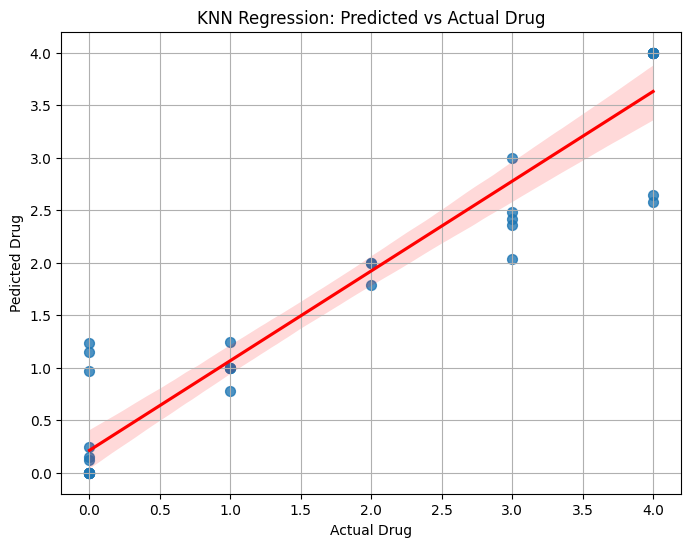

In [22]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"s":50}, line_kws={"color": "red"})
plt.xlabel('Actual Drug')
plt.ylabel('Pedicted Drug')
plt.title("KNN Regression: Predicted vs Actual Drug")
plt.grid(True)
plt.show()